In [1]:
cd C:\Users\idsan\OneDrive\문서\GitHub\pybrep\poisson_disk_sampling

C:\Users\idsan\OneDrive\문서\GitHub\pybrep\poisson_disk_sampling


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm
%matplotlib inline

In [3]:
real_point = np.loadtxt('cells_GINIX_GL.dat', skiprows=1)
conversion_factor = 2*0.178
real_point = real_point * conversion_factor
def filter_real(real_point):
    ii = np.logical_and(real_point[:, 0] > 30, real_point[:, 0] < 300 - 30)
    real_point = real_point[ii, 0:3]
    ii = np.logical_and(real_point[:, 1] > 140 + 30, real_point[:, 1] < 300 - 30)
    real_point = real_point[ii, 0:3]
    ii = np.logical_and(real_point[:, 2] > 30, real_point[:, 2] < 300 - 30)
    real_point = real_point[ii, 0:3]
    return real_point

real_point = filter_real(real_point)

In [4]:
poisson_point = np.loadtxt('Multipy point 3.txt')*300
poisson_point[:, 0] = poisson_point[:, 0]
poisson_point[:, 1] = poisson_point[:, 1]
poisson_point[:, 2] = poisson_point[:, 2]

In [5]:
rand_point = np.random.rand(40000, 3)
rand_point[:, 0] = rand_point[:, 0] * 300
rand_point[:, 1] = rand_point[:, 1] * 150 + 150
rand_point[:, 2] = rand_point[:, 2] * 300

In [6]:
tree_real = spatial.cKDTree(real_point[:, 0:3])
tree_poisson = spatial.cKDTree(poisson_point)
tree_rand = spatial.cKDTree(rand_point)

In [7]:
d_real, _ = tree_real.query(real_point[:, 0:3], k=2)
d_poisson, _ = tree_poisson.query(poisson_point, k=2)
d_rand, _ = tree_rand.query(rand_point, k=2)

d_real = d_real[:, 1]
d_poisson = d_poisson[:, 1]
d_rand = d_rand[:, 1]

In [8]:
def count_neighborhood(x, tree, r):
    temp = tree.query_ball_point(x[:, 0:3], r)
    count = np.array([len(x)-1 for x in temp])
    return count
def count_neighborhood1(x, tree, r):
    temp = tree.query_ball_point(x, r)
    count = np.array([len(x)-1 for x in temp])
    return count

In [9]:
mean_count_real = []
mean_count_poisson = []
mean_count_rand = []
var_count_real = []
var_count_poisson = []
var_count_rand = []
rs = np.arange(0.1,30,0.1)

In [10]:
for r in tqdm(rs):
    c0 = count_neighborhood(real_point, tree_real, r)
    mean_count_real.append(np.mean(c0))
    var_count_real.append(np.var(c0))

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [01:25<00:00,  1.24it/s]


In [11]:
for r in tqdm(rs):
    c1 = count_neighborhood1(poisson_point, tree_poisson, r)
    mean_count_poisson.append(np.mean(c1))
    var_count_poisson.append(np.var(c1))

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [03:50<00:00,  2.36s/it]


In [12]:
for r in tqdm(rs):
    c2 = count_neighborhood1(rand_point, tree_rand, r)
    mean_count_rand.append(np.mean(c2))
    var_count_rand.append(np.var(c2))

100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [03:52<00:00,  2.24s/it]


In [13]:
mean_count_real = np.array(mean_count_real)
mean_count_poisson = np.array(mean_count_poisson)
mean_count_rand = np.array(mean_count_rand)

var_count_real = np.array(var_count_real)
var_count_poisson = np.array(var_count_poisson)
var_count_rand = np.array(var_count_rand)

In [14]:
fig = plt.figure()

    #subplot setting
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xlabel('radius', fontsize = 15)
ax1.set_ylabel('Mean', fontsize = 15)
ax2.set_xlabel('radius', fontsize = 15)
ax2.set_ylabel('Standard Deviation', fontsize = 15)
ax3.set_xlabel('radius', fontsize = 15)
ax3.set_ylabel('Density Fluctuation', fontsize = 15)
ax4.set_xlabel('Mean', fontsize = 15)
ax4.set_ylabel('Standard Deviation', fontsize = 15)

ax1.set_title('Mean', fontsize = 18)
ax2.set_title('Standard Devication', fontsize = 18)
ax3.set_title('Density Fluctuation', fontsize = 18)
ax4.set_title('Mean-SD', fontsize = 18)

ax1.plot(rs, mean_count_real/rs**3, rs, mean_count_poisson/rs**3, rs, mean_count_rand/rs**3)
ax2.plot(rs, np.sqrt(var_count_real)/rs**3, rs, np.sqrt(var_count_poisson)/rs**3, rs, np.sqrt(var_count_rand)/rs**3)
ax3.plot(rs, np.sqrt(var_count_real)/rs**6, rs, np.sqrt(var_count_poisson)/rs**6, rs, np.sqrt(var_count_rand)/rs**6)
ax4.plot(mean_count_real, np.sqrt(var_count_real), mean_count_poisson, np.sqrt(var_count_poisson), mean_count_rand, np.sqrt(var_count_rand))

plt.close('all')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

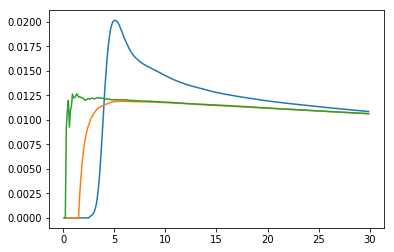

In [21]:
plt.plot(rs, mean_count_real/rs**3, rs, mean_count_poisson/rs**3, rs, mean_count_rand/rs**3)

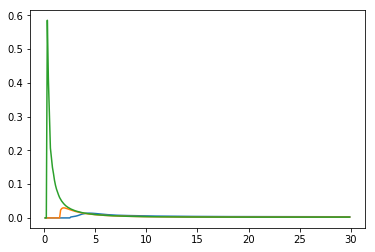

In [22]:
plt.plot(rs, np.sqrt(var_count_real)/rs**3, rs, np.sqrt(var_count_poisson)/rs**3, rs, np.sqrt(var_count_rand)/rs**3)

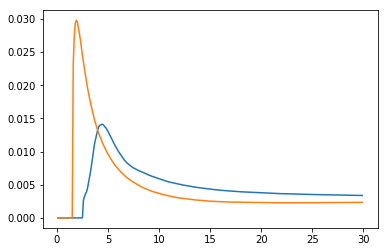

In [23]:
plt.plot(rs, np.sqrt(var_count_real)/rs**3, rs, np.sqrt(var_count_poisson)/rs**3)

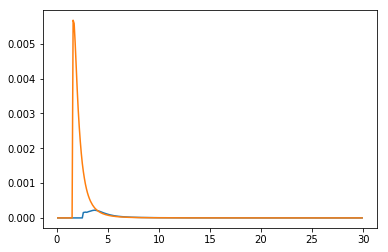

In [25]:
plt.plot(rs, np.sqrt(var_count_real)/rs**6, rs, np.sqrt(var_count_poisson)/rs**6)

(0, 200)

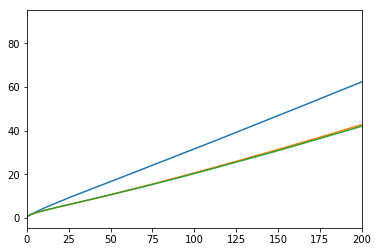

In [31]:
plt.plot(mean_count_real, np.sqrt(var_count_real), mean_count_poisson, np.sqrt(var_count_poisson), mean_count_rand, np.sqrt(var_count_rand))
plt.xlim(0, 200)

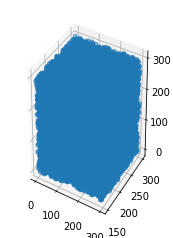

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(poisson_point[:, 0], poisson_point[:, 1], poisson_point[:, 2])